In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#Condición inicial
y0=[0,1]

#Intérvalo de solución
t_ini=0.0
t_end=np.pi*6

#Número de puntos en los que se encontrará la solución (no incluye IC)
N=100

#Tamaño de paso
h=(t_end-t_ini)/N

#Defino la función de fuerza
def func(t,y):
    #y=(x , dxdt)
    x=y[0]
    dxdt=-y[1]
    return np.array([dxdt,x])

#Construyo vector de tiempo para la solución
t_array=[]
for i in range(0,N+1):
    ti=t_ini+i*h
    t_array.append(ti)


def rk4(func,t,y):
    k1=func(t,y)
    k2=func(t+0.5*h , y+0.5*h*k1)
    k3=func(t+0.5*h , y+0.5*h*k2)
    k4=func(t+h,y+h*k3)
    
    value=y+h/6*(k1+2*k2+2*k3+k4)
    
    return value
    

#Solución
sol=np.zeros((N,3))
sol[0][0]=t_array[0]
sol[0][1]=y0[0]
sol[0][2]=y0[1]
for i in range(1,N):
    sol[i][0]=t_array[i]
    sol[i][1]=rk4(func,sol[i-1][0],[sol[i-1][1],sol[i-1][2]])[0]
    sol[i][2]=rk4(func,sol[i-1][0],[sol[i-1][1],sol[i-1][2]])[1]


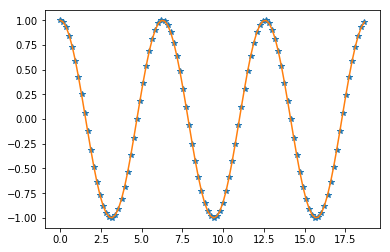

In [39]:
fig=plt.figure()
ax=plt.axes()
ax.plot(sol[:,0],sol[:,2],'*')
ax.plot(sol[:,0],np.cos(sol[:,0]))
plt.show()
